In [18]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Importing the dataset
dataset = pd.read_csv('HealthData.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:, 13].values

In [19]:

#handling missing data

from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values='NaN',strategy='mean')
imputer=SimpleImputer().fit(X[:,11:13])
X[:,11:13]=imputer.transform(X[:,11:13])
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [20]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


DecisionTreeClassifier(criterion='entropy', random_state=0)

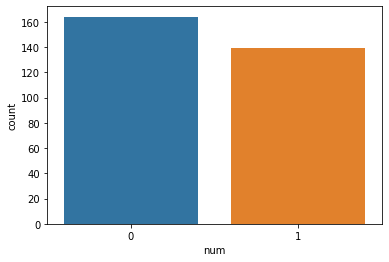

In [21]:
#EXPLORING THE DATASET
import seaborn as sn
sn.countplot(x='num',data=dataset)
dataset.num.value_counts()

# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

In [22]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

#ACCURACY SCORE
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.7213114754098361

              precision    recall  f1-score   support

           0       0.75      0.77      0.76        35
           1       0.68      0.65      0.67        26

    accuracy                           0.72        61
   macro avg       0.72      0.71      0.71        61
weighted avg       0.72      0.72      0.72        61



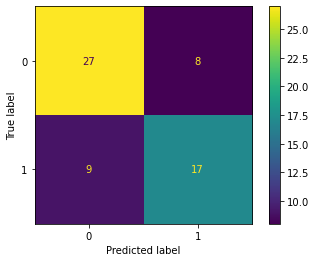

In [23]:
##CONFUSION MATRIX
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay.from_predictions(
   y_test, y_pred)

#Interpretation:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

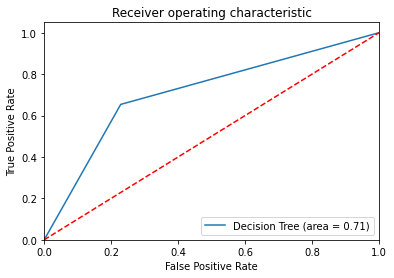

In [24]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()